# Basic Linear Regression in Python

This Jupyter notebook contains examples of this weeks topic.

What are the features?

TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)  
Radio: advertising dollars spent on Radio  
Newspaper: advertising dollars spent on Newspaper

What is the response?

Sales: sales of a single product in a given market (in thousands of widgets)



In [ ]:
# In this cell we import the modules we want to use later on.

import pandas as pd    # To work with tables
import numpy      # For maths
import seaborn    # For advanced plots
import cufflinks  # For interactive plots
from matplotlib import pyplot as plt # For graphs

## Importing data

Data can be easily imported from spreadsheets or databases.

The `pandas` module provides common functions for working with (_n_-dimensional) tabular data in Python.

In [ ]:
# Import a dataset of advertising spends
advert = pd.read_csv('Advertising.csv', index_col=0)

# Display the first five rows of the data
advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
# print the shape of the DataFrame
advert.shape

(200, 4)

There are 200 observations, and thus 200 markets in the dataset.



Data can be pivoted and reflowed:

In [ ]:
# Make a table with one row per ad channel
pivoted = pd.melt(advert.reset_index(), id_vars=['index', 'sales'])

# Rename columns to be more friendly
pivoted = pivoted.rename(columns={'index':'transaction', 'value':'spend', 'variable':'channel'})

pivoted.head()

,transaction,sales,channel,spend
0,1,22.1,TV,230.1
1,2,10.4,TV,44.5
2,3,9.3,TV,17.2
3,4,18.5,TV,151.5
4,5,12.9,TV,180.8


## Taking a look at the data

We can quickly visualise the relationships in the data.

The `seaborn` module provides many common plots.

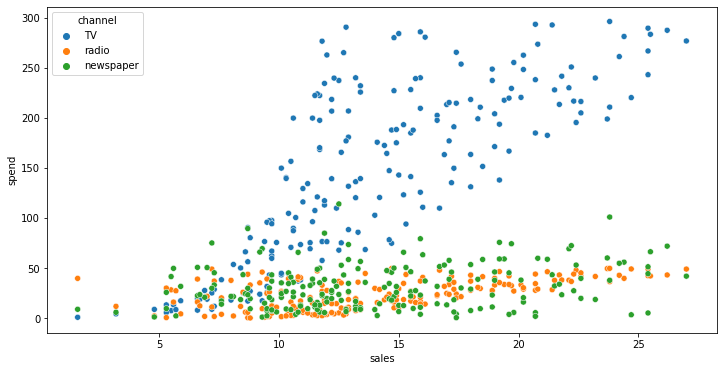

In [ ]:
plt.figure(figsize=(12, 6))
ax = seaborn.scatterplot(data=pivoted, x='sales', y='spend', hue='channel')

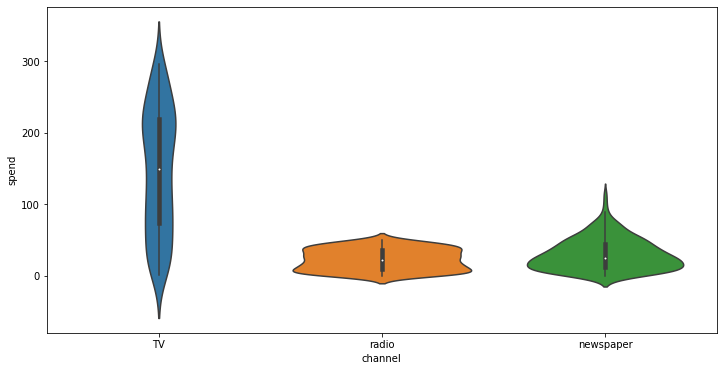

In [ ]:
plt.figure(figsize=(12, 6))
ax = seaborn.violinplot(data=pivoted, y='spend', x='channel')

## Modeling the data

Modules such as `scikit-learn` offer a huge range of options to model data.

Here we build a simple linear regression model to predict sales as a function to advertising spend.

In [ ]:
from sklearn.linear_model import LinearRegression

# Build linear regression model using TV as predictor
# Split data into predictor X and output Y

predictor = ['TV']
X = advert[predictor]
y = advert['sales']

# Initialise and fit model
lm = LinearRegression()
model_TV = lm.fit(X, y)

In [ ]:
# We can examine the model coefficients
print(f'alpha = {model_TV.intercept_}')
print(f'betas = {model_TV.coef_}')

alpha = 7.032593549127695
betas = [0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?

A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.

Or more clearly: An additional 1,000 USD spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

# Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$$$y = 7.032594 + 0.047537 \times 50$$

In [ ]:
# manual calculation of the prediction
7.032594 + 0.047537*50

9.409444

In [ ]:
# And predict Sales for TV  advertising spend
new_X = [[50]]
print(model_TV.predict(new_X))

[9.40942557]


This means that we would predict Sales of 9.41 widgets in that market.



## Model validation


`sklearn` has many functions to simplify the validation of models, such as generating training/test splits.

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the data 80-20 into a training and test set
train, test = train_test_split(advert, test_size=0.2)

In [ ]:
#?LinearRegression

In [ ]:
# Build linear regression model on the training data using TV as predictor
predictor = ['TV']
X = train[predictor]
y = train['sales']

# Initialise and fit model
lm = LinearRegression()
model_All = lm.fit(X, y, )

In [ ]:
# Use the model to predict sales for our test data
test['predictions'] = model_All.predict(test[predictor])

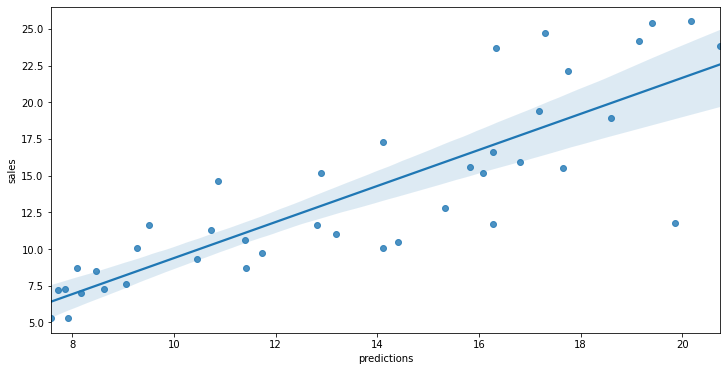

In [ ]:
plt.figure(figsize=(12, 6))
ax = seaborn.regplot(y='sales', x='predictions', data=test)

`sklearn` has built in functions to generate quality metrics such as R²

In [ ]:
r_squared = model_All.score(test[predictor], test["sales"])
print(f'Model R²: {r_squared:.2f}')

Model R²: 0.69


The goodness of fit is nearly 70% which is acceptable.

## Time to practice!

Build a model predicting sales as a function of only radio and newpaper spend, and compare it to previous model. 

Which one was the best/worst?

In [ ]:
# Your code here

# Multiple Linear Regression


Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$


In [ ]:
# create X and y
predictors = ['TV', 'radio', 'newspaper']
X = train[predictors]
y = train.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9212506388520083
[0.04429402 0.19491511 0.00124125]


How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an increase of $1000 in TV ad spending is associated with an increase in Sales of 43 widgets.

In [ ]:
# pair the feature names with the coefficients
print(list(zip(predictors, lm.coef_)))

[('TV', 0.04429402302617282), ('radio', 0.19491510878824142), ('newspaper', 0.0012412507172111786)]


In [ ]:
# predict for a new observation

new_X = [[100, 25, 25]]
print(lm.predict(new_X))

[12.25456193]


This means that we would predict Sales of 12.32 widgets in that market.


In [ ]:
# calculate the R-squared
r2 = lm.score(X, y)
print(f'Model R²: {r2:.2f}')

Model R²: 0.90


As you can see, when taking into account more regressors the accuracy of the model improves.

Note that p-values and confidence intervals are not (easily) accessible through scikit-learn.

